In [1]:
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"D:\VUB\_data\gleam_v41\daily_data")

In [7]:
var_names = ["E","S", "SMrz","SMs"]

gleam_dataset = xr.Dataset()
for var_name in var_names:
    files = glob.glob(f"{var_name}_*.nc")
    files.sort()
    
    with xr.open_mfdataset(files) as ds:
        ds_roi = ds.sel(lat=slice(5.5, -1.0), lon=slice(32,40))
        gleam_dataset[var_name] = ds_roi[var_name]

In [61]:
gleam_dataset.to_netcdf("gleam_daily_v41_2000_2023.nc")

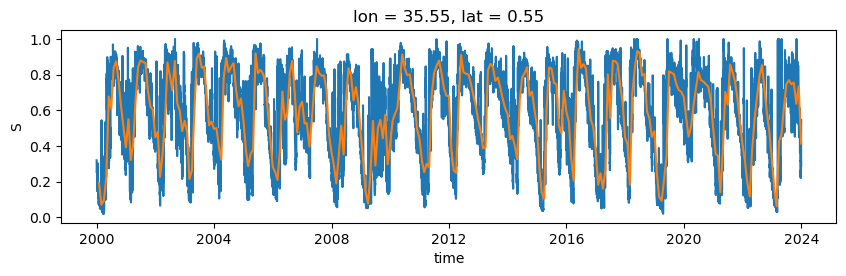

In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,2.5))
gleam_dataset["S"].sel(lat=0.5, lon=35.5,method='nearest').plot(ax=ax)
gleam_dataset['S'].resample(time='ME').mean().sel(lat=0.5, lon=35.5,method='nearest').plot( ax=ax)